<a href="https://colab.research.google.com/github/treetops81/HR-Research-Project/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Inspiration**

I'll be using a Human Resources dataset from Kaggle to investigate the below questions using various different methods. Further information for the dataset can be found here: https://rpubs.com/rhuebner/hrd_cb_v14

- Is there any relationship between who a person works for and their performance score?
- What is the overall diversity profile of the organization?
- What are our best recruiting sources if we want to ensure a diverse organization?
- Can we predict who is going to terminate and who isn't? 
- Are there areas of the company where pay is not equitable?

***Before we start we'll need to do some exploratory data analysis***

In [ ]:
# data manipulation
import pandas as pd
import numpy as np

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# useful
from collections import Counter

In [ ]:
df = pd.read_csv(r'https://raw.githubusercontent.com/treetops81/HR-Research-Project/main/HRDataset_v14.csv')

In [ ]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [ ]:
df.shape

(311, 36)

In [ ]:
# We can see that only the date of termination column has missing values. 
df.isna().sum()

# df_term = df[df['Termd'] == 1]
# df_no_term = df[df['Termd'] == 0]
# df_term.isna().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatis

In [ ]:
# This looks reasonable for satisfaction amoung staff
df.EmpSatisfaction.value_counts()

3    108
5     98
4     94
2      9
1      2
Name: EmpSatisfaction, dtype: int64

In [ ]:
# Min value looks reasonable, but more investigation is needed for the maximum values
df.Salary.describe()

count       311.000000
mean      69020.684887
std       25156.636930
min       45046.000000
25%       55501.500000
50%       62810.000000
75%       72036.000000
max      250000.000000
Name: Salary, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


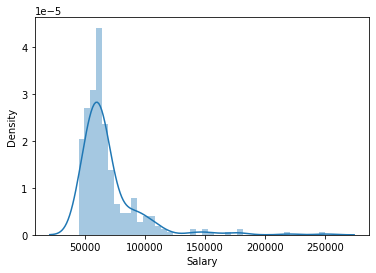

In [ ]:
# This plot shows that the volume of high salary individuals above 125k is very low
sns.distplot(a = df.Salary)

In [ ]:
# These salaries look correct, all of these positions would be expected to have higher salaries than others. We also check there are no other managers in our dataset.
df[df['Salary'] > 125000].head()
# df[df['Salary'] > 125000]
# df[df['Position'].str.contains('IT Manager')]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
55,"Corleone, Vito",10019,0,0,1,1,5,4,0,170500,0,10,Director of Operations,MA,2030,03/19/83,M,Single,US Citizen,No,Black or African American,1/5/2009,NaN,N/A-StillEmployed,Active,Production,Janet King,2.0,Indeed,Exceeds,3.70,5,0,2/4/2019,0,15
76,"Dougall, Eric",10028,0,0,1,1,3,4,0,138888,0,13,IT Manager - Support,MA,1886,07/09/70,M,Single,US Citizen,No,Black or African American,1/5/2014,NaN,N/A-StillEmployed,Active,IT/IS,Jennifer Zamora,5.0,Indeed,Exceeds,4.30,5,5,1/4/2019,0,4
96,"Foss, Jason",10015,0,0,1,1,3,4,0,178000,0,12,IT Director,MA,1460,07/05/80,M,Single,US Citizen,No,Black or African American,4/15/2011,NaN,N/A-StillEmployed,Active,IT/IS,Jennifer Zamora,5.0,Indeed,Exceeds,5.00,5,5,1/7/2019,0,15
131,"Houlihan, Debra",10272,1,1,0,1,6,3,0,180000,0,11,Director of Sales,RI,2908,03/17/66,F,Married,US Citizen,No,White,5/5/2014,NaN,N/A-StillEmployed,Active,Sales,Janet King,2.0,LinkedIn,Fully Meets,4.50,4,0,1/21/2019,0,19
150,"King, Janet",10089,1,1,0,1,2,3,0,250000,0,16,President & CEO,MA,1902,09/21/54,F,Married,US Citizen,Yes,White,7/2/2012,NaN,N/A-StillEmployed,Active,Executive Office,Board of Directors,9.0,Indeed,Fully Meets,4.83,3,0,1/17/2019,0,10


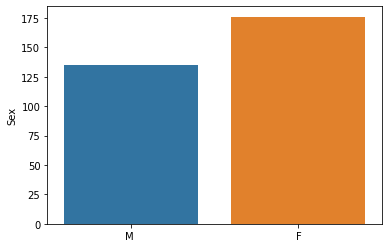

In [ ]:
sns.barplot(x=df.Sex.unique(), y=df.Sex.value_counts()[df.Sex.unique()])

In [ ]:
# Looks like the company is based in Massachusetts. I will assume that anyone else is working remotely
df.State.value_counts()
df['Remote'] = np.where(df['State'] == 'MA', 0, 1)

In [ ]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Remote
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,0
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,0
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,0
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15,0
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2,0
